In [1]:
import sys, os 
from os.path import dirname
path = dirname(dirname(os.getcwd()))
sys.path.insert(0, path)
sys.path.insert(0, '/home/monte.flora/python_packages/scikit-explain')

import skexplain 
from skexplain.common.importance_utils import to_skexplain_importance
from skexplain.common.contrib_utils import group_local_values, group_feature_values
from skexplain.plot.plot_feature_contributions import add_summary_plot_cb

from src.io.io import load_data_and_model
from src.io.display_names import feature_colors, display_feature_names, display_units
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [21]:
dataset = 'new_severe_wind'
option = 'original'
BASE_PATH = '/work/mflora/explainability_work/'
DATA_BASE_PATH = os.path.join(BASE_PATH, 'datasets')
MODEL_BASE_PATH = os.path.join(BASE_PATH, 'models')
model, X, y, groups = load_data_and_model(dataset, option, DATA_BASE_PATH, 
                                          MODEL_BASE_PATH, return_groups=True)

In [22]:
X['target'] = y
X.to_csv('severe_wind.csv')

In [11]:
interaction_index= {'road_surface' : 'swave_flux', 
                    'lightning' : 'q100_vl',
                    'new_severe_wind' : 'ws_80__time_max__amp_ens_mean_spatial_perc_90'
                   }

In [4]:
shap_ds = xr.load_dataset(os.path.join(BASE_PATH, 'new_results', f'shap_{dataset}_original.nc'))
ale_data = xr.load_dataset(os.path.join(BASE_PATH, 'new_results', f'ale_{dataset}_original.nc'))

shap_df = pd.DataFrame(shap_ds[f'shap_values__{model[0]}'], columns=shap_ds.attrs['features'])

X = pd.DataFrame(shap_ds['X'].values, columns=shap_ds.attrs['features'])
y = shap_ds['y'].values

In [18]:
# total coverage 
# outgoing longwave radiation 

'uplwav_flux'
'sfc_temp'
'tot_cloud'


'tot_cloud'

In [19]:
X_sub = X.loc[X['swave_flux']>100]
X_sub = X_sub.loc[X['tot_cloud']>0.2]
X_sub['sfc_temp'].mean()


-0.697892594276349

In [20]:
X_sub = X.loc[X['swave_flux']<100]
X_sub = X_sub.loc[X['tot_cloud']<0.2]
X_sub['sfc_temp'].mean()
# 28.4 def F 

-2.446764156736692

Text(-0.05, 1.02, '(b)')

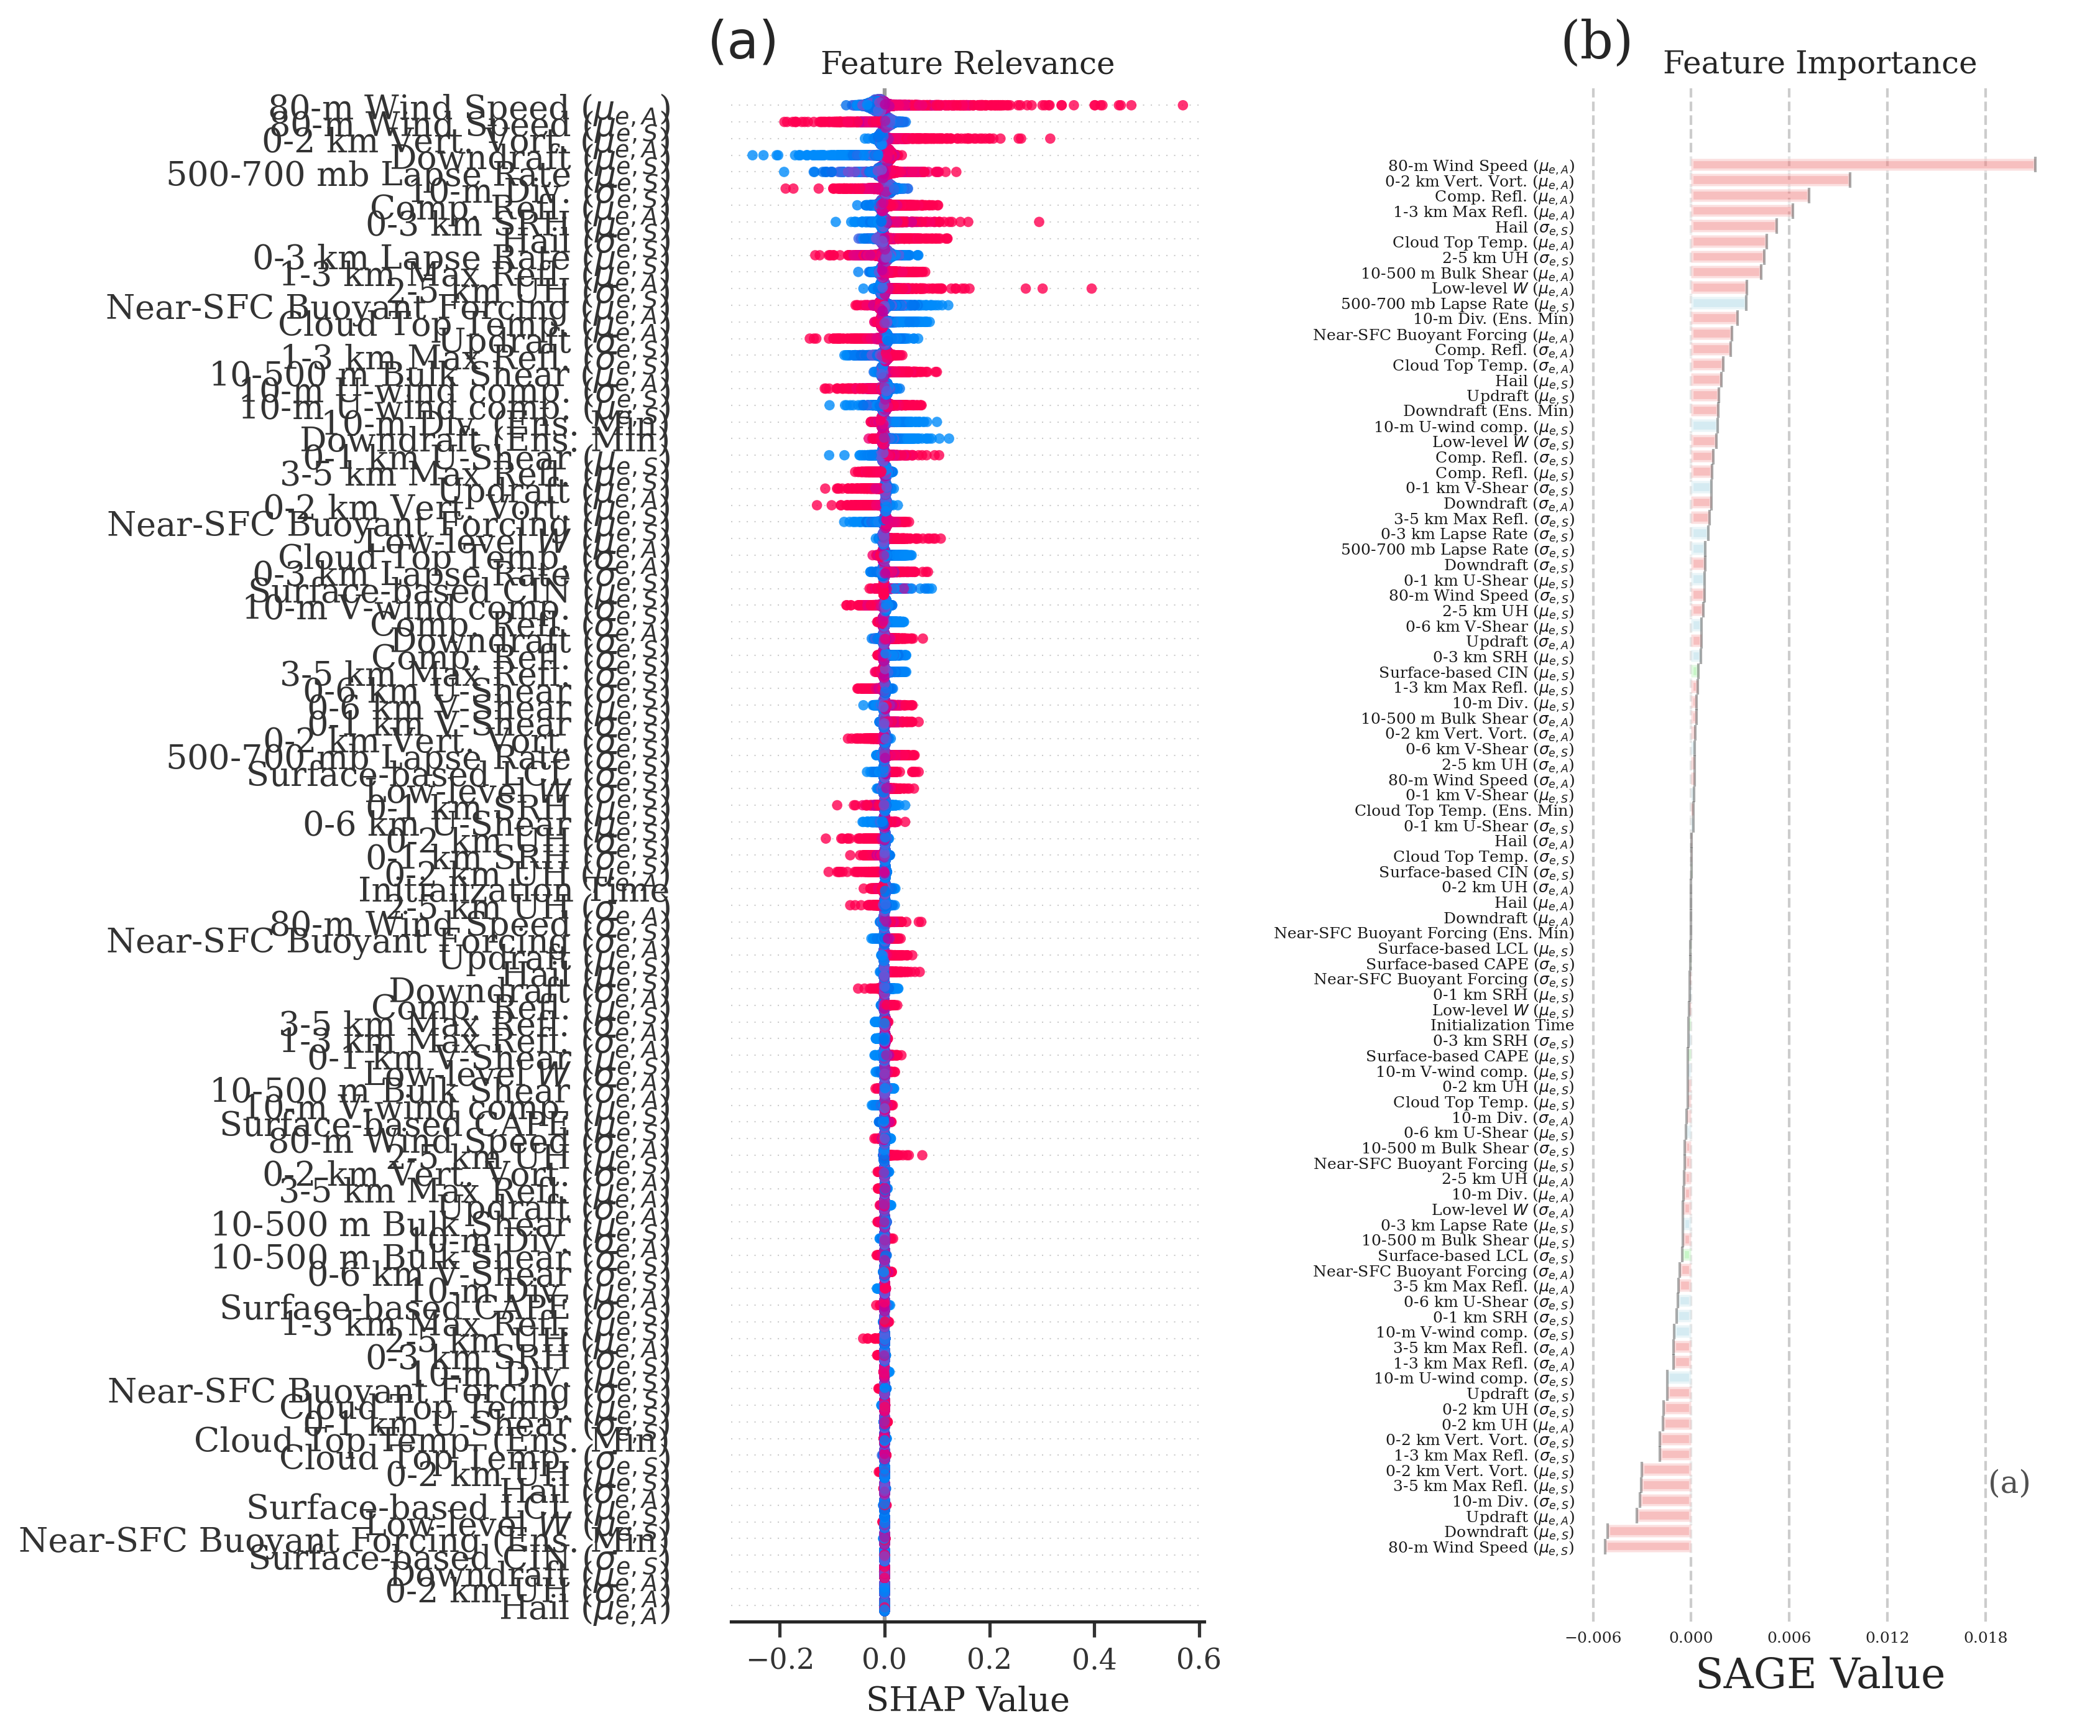

In [5]:
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(12,10))

explainer = skexplain.ExplainToolkit(X=X)
sage_rank = explainer.load(os.path.join(BASE_PATH, 'new_results', f'sage_rank_{dataset}_original.nc'))

# Rank the grouped SHAP values by the 75th percentile.
est_name = model[0]
vals = shap_ds[f'shap_values__{est_name}'].values
order = np.argsort(np.mean(np.absolute(vals), axis=0))[::-1]

# Left panel: SHAP 
ax, color = explainer.scatter_plot(plot_type='summary', 
                       dataset=shap_ds, 
                       estimator_name=model[0], method='shap',
                       order=order, 
                       display_feature_names=display_feature_names,
                       ax=axes[0],
                       fig=fig,
                       add_colorbar=False,
                       max_display=len(X)
                      )
ax.set_xlabel('SHAP Value')
ax.set_title('Feature Relevance', fontsize=12)
ax.annotate('(a)', (-0.05, 1.02), xycoords='axes fraction', fontsize=20)

# Right panel: SAGE
data = [sage_rank]
panels = [ ('sage', est_name)]
explainer.plot_importance(data=data, panels=panels, 
                                num_vars_to_plot=len(X), 
                                feature_colors=feature_colors,
                                display_feature_names=display_feature_names,
                                n_columns=1,
                                base_font_size= 18,
                                alphabet_fontsize=12, 
                                rho_threshold=0.7,
                                xlabels=['SAGE Value'],
                                ax=axes[1], 
                               )
axes[1].xaxis.grid(ls='dashed')
axes[1].set_title('Feature Importance', fontsize=12)
axes[1].annotate('(b)', (-0.05, 1.02), xycoords='axes fraction', fontsize=20)

Text(-0.05, 1.02, '(b)')

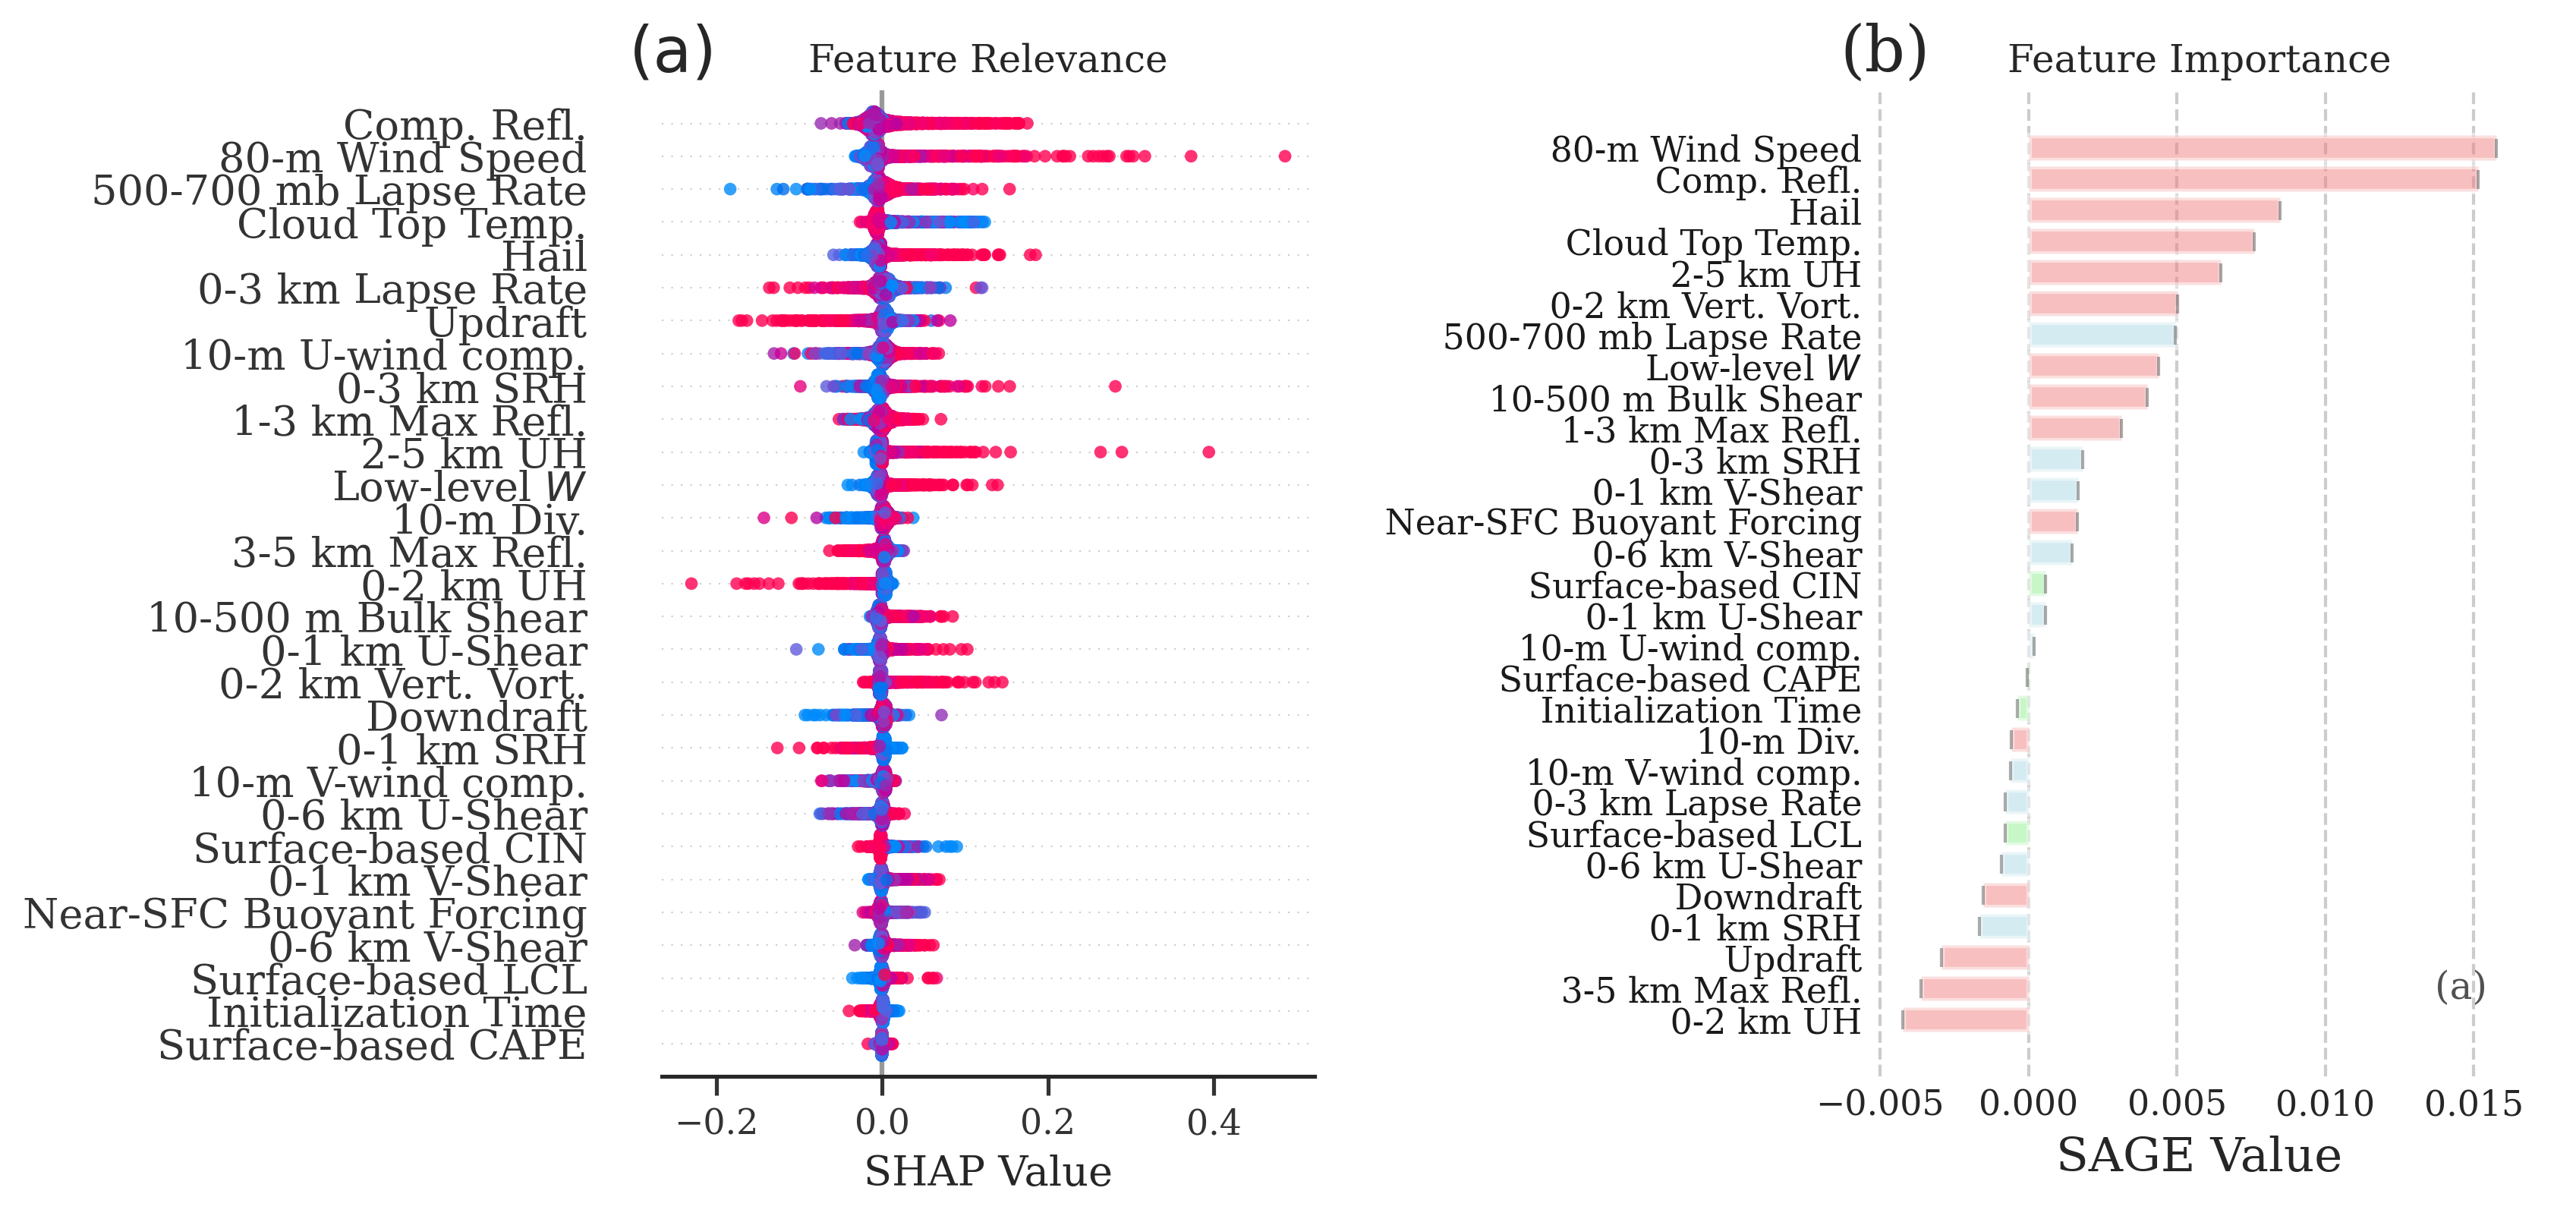

In [8]:
fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(12,6))

inds=None
X_grouped = group_feature_values(X, groups, inds, func=np.max)
grouped_shap_ds = group_local_values(shap_ds, groups, X_grouped, inds)

explainer = skexplain.ExplainToolkit(X=X_grouped)
sage_rank = explainer.load(os.path.join(BASE_PATH, 'new_results', f'grouped_sage_rank_{dataset}_original.nc'))


# Rank the grouped SHAP values by the 75th percentile.
est_name = model[0]
vals = grouped_shap_ds[f'shap_values__{est_name}'].values
order = np.argsort(np.mean(np.absolute(vals), axis=0))[::-1]

# Left panel: SHAP 
ax, color = explainer.scatter_plot(plot_type='summary', 
                       dataset=grouped_shap_ds, 
                       estimator_name=model[0], method='shap',
                       order=order, 
                       display_feature_names=display_feature_names,
                       ax=axes[0],
                       fig=fig,
                       add_colorbar=False,
                       max_display=len(X)
                      )
ax.set_xlabel('SHAP Value')
ax.set_title('Feature Relevance', fontsize=12)
ax.annotate('(a)', (-0.05, 1.02), xycoords='axes fraction', fontsize=20)

# Right panel: SAGE
data = [sage_rank]
panels = [ ('sage', est_name)]
explainer.plot_importance(data=data, panels=panels, 
                                num_vars_to_plot=len(X), 
                                feature_colors=feature_colors,
                                display_feature_names=display_feature_names,
                                n_columns=1,
                                base_font_size= 17,
                                alphabet_fontsize=12, 
                                rho_threshold=0.7,
                                xlabels=['SAGE Value'],
                                ax=axes[1], 
                               )
axes[1].xaxis.grid(ls='dashed')
axes[1].set_title('Feature Importance', fontsize=12)
axes[1].annotate('(b)', (-0.05, 1.02), xycoords='axes fraction', fontsize=20)

In [17]:
features

['w_down__time_min__ens_mean__spatial_mean',
 'w_down__time_min__ens_std__spatial_mean',
 'w_down__time_min__ens_min__spatial_mean',
 'w_down__time_min__amp_ens_std_spatial_perc_10',
 'w_down__time_min__amp_ens_mean_spatial_perc_10']

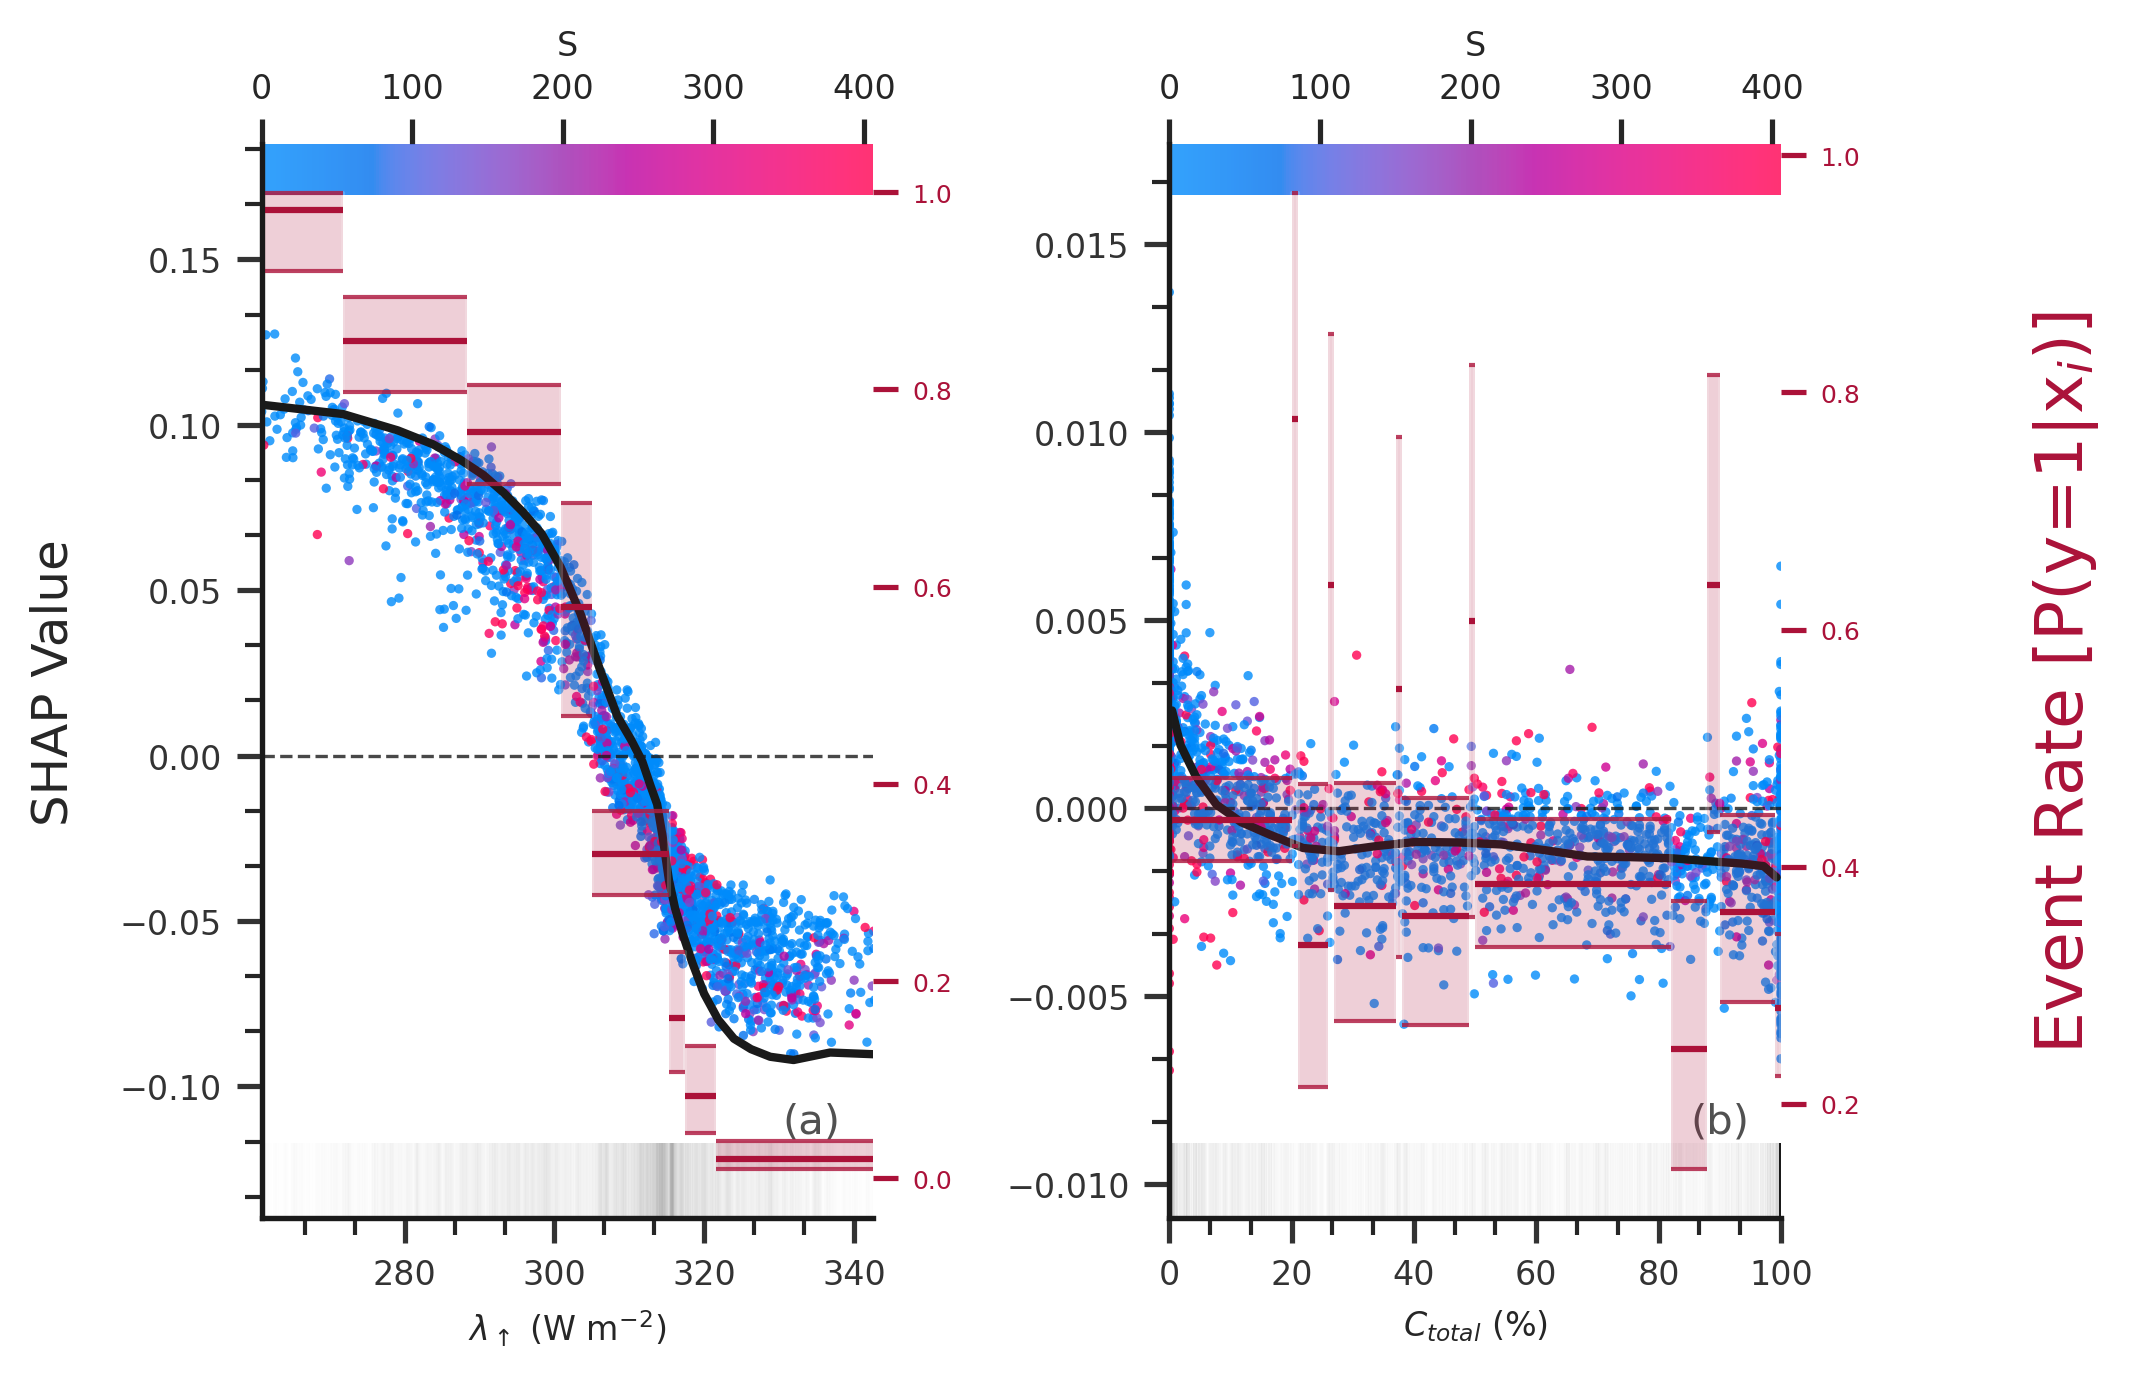

In [12]:
from skexplain.plot.base_plotting import PlotStructure
from bayeshist import bayesian_histogram, plot_bayesian_histogram
import seaborn as sns
plotter= PlotStructure(BASE_FONT_SIZE = 16)

explainer = skexplain.ExplainToolkit()
rank = explainer.load(os.path.join(BASE_PATH, 'new_results', f'sage_rank_{dataset}_original.nc'))
#features = list(rank[f'sage_rankings__{model[0]}'].values[:6]) + ['vdd_flux', 'mid_cloud', 'tot_cloud',]

features = ['uplwav_flux',
            'tot_cloud'
           ]

explainer = skexplain.ExplainToolkit()
shap_ds = explainer.load(os.path.join(BASE_PATH, 'new_results', f'shap_{dataset}_original.nc'))
vals_df = pd.DataFrame(shap_ds[f'shap_values__{model[0]}'].values, columns=shap_ds.attrs['features'])

ylabel = 'SHAP Value'

histdata=X.copy()
histdata['target'] = y
fig, axes = explainer.scatter_plot(
                    plot_type = 'dependence',
                    features=features,
                    dataset = shap_ds,
                    method = 'shap',
                    estimator_name = model[0],
                    display_feature_names=display_feature_names,
                    display_units = display_units,
                    interaction_index=interaction_index[dataset],
                    orientation = 'horizontal',
                    ylabel = ylabel,

        )  


# Compute the Bayes-derived event rate
for f, ax in zip(features, axes.flat):

    #ax.set_ylim([0, 0.5])
    #data = X[f].values.astype(float)
    #bin_edges, beta_dist = bayesian_histogram(data, y)
    ax_twin = plotter.make_twin_ax(ax)
    ax_twin.set_zorder(ax.get_zorder() + 1)
    ax_twin.patch.set_visible(False)
    ax.patch.set_visible(False)
    sns.despine(ax=ax_twin)
    for spine in ax_twin.spines.values():
        spine.set_edgecolor('k')
    
    data = X[f].values.astype(float)
    bin_edges, beta_dist = bayesian_histogram(data, y)
    base_rate = beta_dist.median()#*100.
    centered_base_rate = base_rate-np.mean(base_rate)
    bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])
    #ax_twin.plot(bin_centers, centered_base_rate, color = 'xkcd:rouge', label='Event Rate', 
    #             ls='dashed', lw=2.,
    #            alpha=0.6)
    # Customize the tick colors
    ax_twin.tick_params(colors='xkcd:rouge')
    
    plot_bayesian_histogram(bin_edges, beta_dist, ax=ax_twin, color = 'xkcd:rouge', label='Event Rate')
    
    ax.plot(ale_data[f'{f}__bin_values'], 
                    ale_data[f'{f}__{model[0]}__ale'].values[0], color='k', lw=2.0, 
                   label='ALE')
    
    # Add rug plot.
    sns.rugplot(data=X, x=f, ax=ax, lw=0.75, alpha=0.002, height=0.07, color='k')
    
    #min_val = np.percentile(centered_base_rate, 0)
    #max_val = np.percentile(centered_base_rate, 100)*1.05
    
    #ax.set_ylim((min_val, max_val))
    
major_ax = plotter.set_major_axis_labels(fig, 
                              xlabel=None, 
                              ylabel_right='Event Rate [P(y=1|x$_{i}$)]', title=None,
                              ylabel_right_color = 'xkcd:rouge',
                              labelpad=30, 
    )    

plt.tight_layout()

In [ ]:
import shap
preds = model[1].predict_proba(X)[:,1]
prob = 0.4
inds = np.where(preds>=prob)[0]
inds = None

#inds = np.where(X['ws_80__time_max__amp_ens_mean_spatial_perc_90'] > 35)[0]

X_grouped = group_feature_values(X, groups, inds, func=np.max)
grouped_shap_ds = group_local_values(shap_ds, groups, X_grouped, inds)

explainer = skexplain.ExplainToolkit(X=X_grouped)

# Rank the grouped SHAP values by the 75th percentile. 
vals = grouped_shap_ds[f'shap_values__{model[0]}'].values
vals = np.percentile(vals, 90, axis=0)
order = np.argsort(vals)[::-1]

explainer.scatter_plot(plot_type='summary', 
                       dataset=grouped_shap_ds, 
                       estimator_name=model[0], method='shap',
                       order=order, 
                       display_feature_names=display_feature_names,
                      )
ax = plt.gca()
ax.set_xlabel(r'$\sum$ SHAP Values')
if inds is None:
    ax.set_title(f'Ranked Grouped SHAP Values by 90th Percentile')
else:
    ax.set_title(f'Grouped SHAP for Probs > {int(prob*100)}%')
    #ax.set_title(f'Grouped SHAP for 80-m Wind speed > 30 m/s')

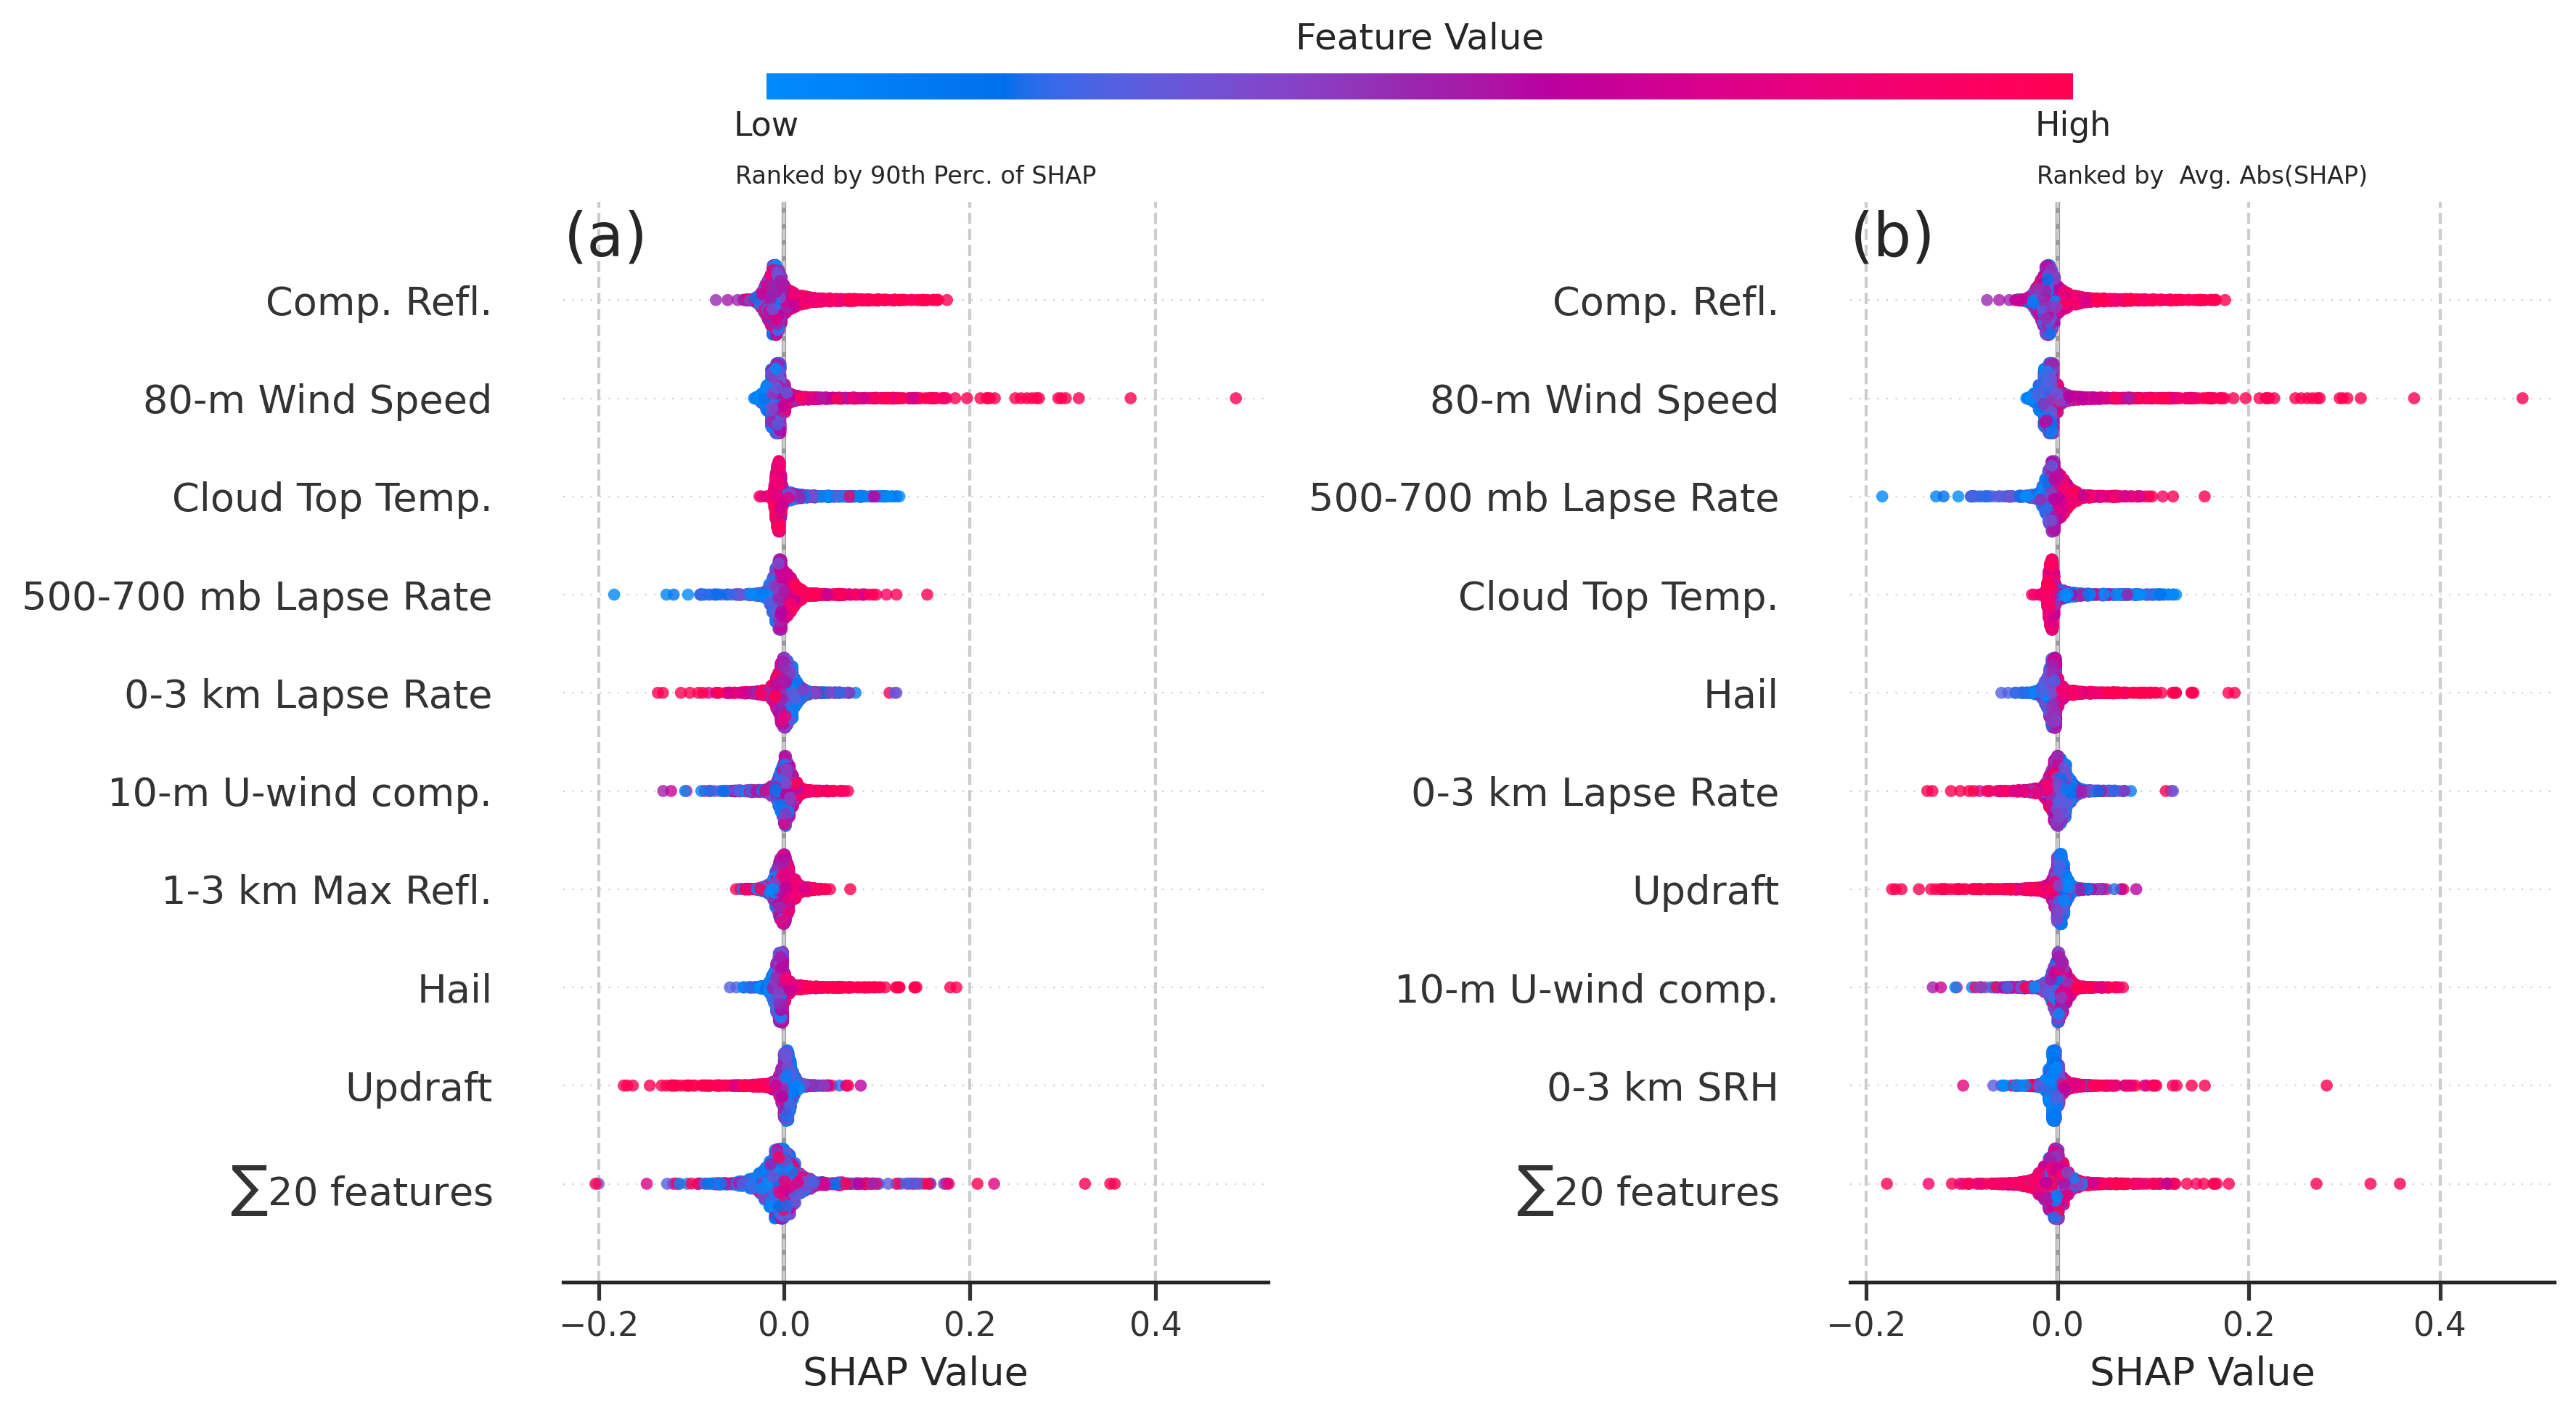

In [9]:
inds=None
explainer = skexplain.ExplainToolkit(X=X_grouped,)

# Rank the abs SHAP values by the 90th percentile. 
#vals = shap_ds[f'shap_values__{model[0]}'].values

vals = grouped_shap_ds[f'shap_values__{model[0]}'].values

per = 90
order1 = np.argsort(np.percentile(vals, per, axis=0))[::-1]

# Rank the grouped SHAP values by the 75th percentile. 
order2 = np.argsort(np.mean(np.absolute(vals), axis=0))[::-1]

# Set the default font size for axes
plt.rcParams['axes.labelsize'] = 20

fig, axes = plt.subplots(dpi=300, ncols=2, figsize=(12,6))
xlabels=[ f'{per}th Perc. of SHAP', ' Avg. Abs(SHAP)']
labels = ['(a)', '(b)']

for i, (ax, order) in enumerate(zip(axes.flat, [order1, order2])):
    ax, color = explainer.scatter_plot(plot_type='summary', 
                       dataset=grouped_shap_ds, 
                       estimator_name=model[0], method='shap',
                       order=order, 
                       display_feature_names=display_feature_names,
                       ax=ax,
                       fig=fig,
                       add_colorbar=False,
                       max_display=10
                      )
    ax.xaxis.grid(ls='dashed')
    ax.set_xlabel(r'SHAP Value')
    ax.set_title(f'Ranked by {xlabels[i]}')
    ax.annotate(labels[i], (0., 0.95), xycoords='axes fraction', fontsize=20)
    
add_summary_plot_cb(color, cax=True, fig=fig)
plt.tight_layout()
    

In [2]:
explainer = skexplain.ExplainToolkit(seaborn_kws={'style' : 'dark'})
sage_rank = explainer.load(os.path.join(BASE_PATH, 'new_results', f'new_grouped_sage_rank_{dataset}_original.nc'))

est_name = model[0]

vals = np.mean(np.absolute(grouped_shap_ds[f'shap_values__{est_name}'].values), axis=0)
#vals = np.percentile(grouped_shap_ds[f'shap_values__{est_name}'].values, 99, axis=0)

vals = vals.reshape(1, len(vals))

shap_rank = to_skexplain_importance(vals, 
                                     estimator_name=est_name, 
                                     feature_names=list(grouped_shap_ds.attrs['features']), 
                                     method ='shap_sum', 
                                     normalize=False    
                                       )



data = [shap_rank, sage_rank]
panels = [('shap_sum', est_name), ('sage', est_name)]

xlabels=['SHAP', 'SAGE']
fig, axes = explainer.plot_importance(data=data, panels=panels, 
                                num_vars_to_plot=30, 
                                feature_colors=feature_colors,
                                display_feature_names=display_feature_names,
                                figsize=(8,4), 
                                xlabels=xlabels,
                                base_font_size= 12,
                                alphabet_fontsize=12, 
                                rho_threshold=0.7,
                               )
for ax in axes.flat:
    ax.xaxis.grid(ls='dashed')
    ax.set_title('')
    
plt.tight_layout()

NameError: name 'skexplain' is not defined

In [ ]:
explainer = skexplain.ExplainToolkit(seaborn_kws={'style' : 'dark'})
sage_rank = explainer.load(os.path.join(BASE_PATH, 'new_results', f'sage_rank_{dataset}_original.nc'))

est_name = model[0]


vals = np.percentile(shap_ds[f'shap_values__{est_name}'].values, 99, axis=0)
vals = vals.reshape(1, len(vals))
shap_rank = to_skexplain_importance(vals, 
                                     estimator_name=est_name, 
                                     feature_names=list(shap_ds.attrs['features']), 
                                     method ='shap_sum', 
                                     normalize=False    
                                       )

data = [shap_rank, sage_rank]
panels = [('shap_sum', est_name), ('sage', est_name)]

xlabels=['SHAP', 'SAGE']
fig, axes = explainer.plot_importance(data=data, panels=panels, 
                                num_vars_to_plot=10, 
                                feature_colors=feature_colors,
                                display_feature_names=display_feature_names,
                                figsize=(9,4), 
                                n_columns=2,
                                xlabels=xlabels,
                                base_font_size= 12,
                                alphabet_fontsize=12, 
                                rho_threshold=0.7,
                                 
                               )
for ax in axes.flat:
    ax.xaxis.grid(ls='dashed')
    ax.set_title('')
    
plt.tight_layout()